In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [18]:
# Convert the dataset into a pandas DataFrame for easier analysis
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data['Species'] = iris.target

In [19]:
# Replace numeric species labels with the actual names
species_map = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
iris_data['Species'] = iris_data['Species'].map(species_map)

In [20]:
print("First few rows of the dataset:")
print(iris_data.head())

First few rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  Species  
0  Setosa  
1  Setosa  
2  Setosa  
3  Setosa  
4  Setosa  


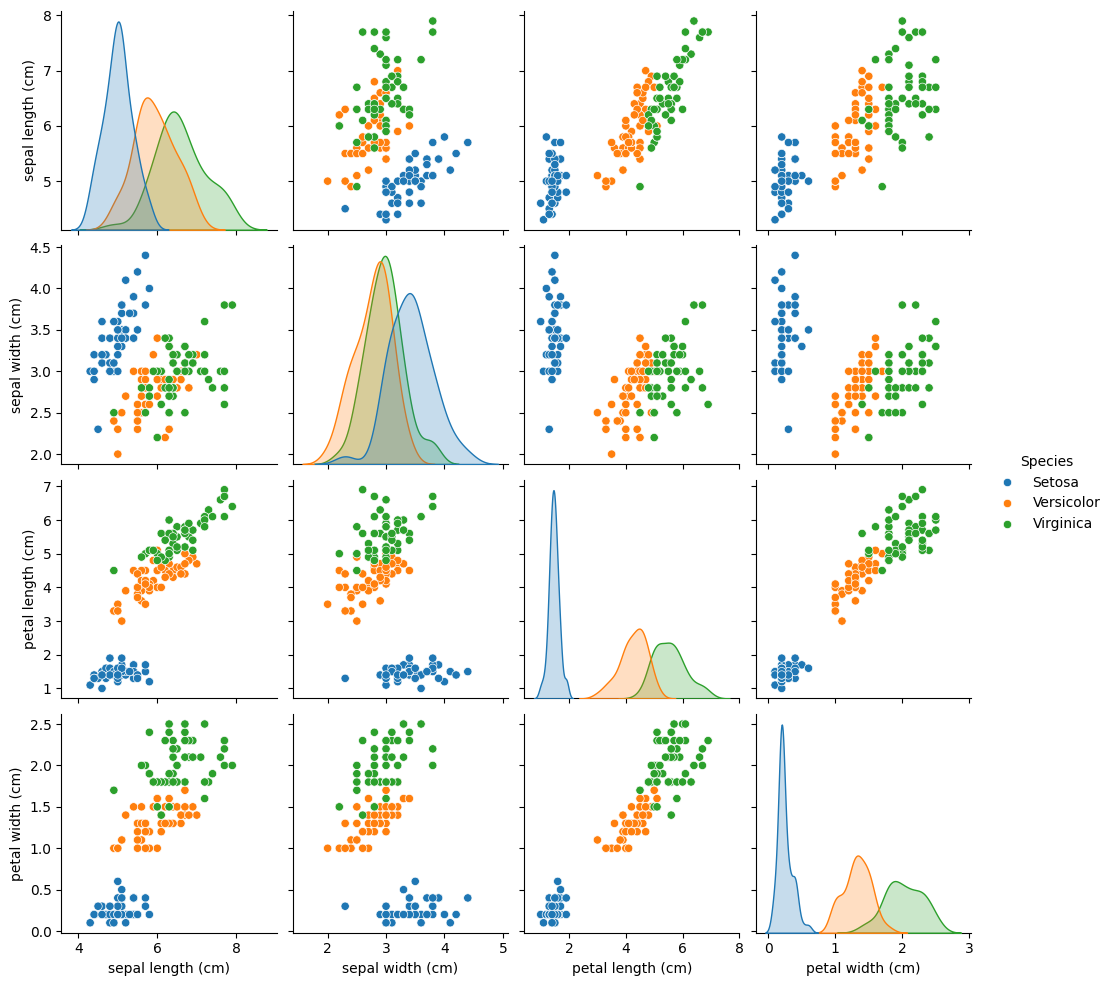

In [21]:
# EDA: Pairplot to visualize features
sns.pairplot(data, hue='Species')
plt.show()

In [22]:
X = iris_data[iris.feature_names]
y = iris_data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
print("\nTraining the Random Forest Classifier...")
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


Training the Random Forest Classifier...


RandomForestClassifier(random_state=42)

In [24]:
y_pred = model.predict(X_test)

In [25]:
#Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of the model: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy of the model: 1.00

Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




Confusion Matrix:


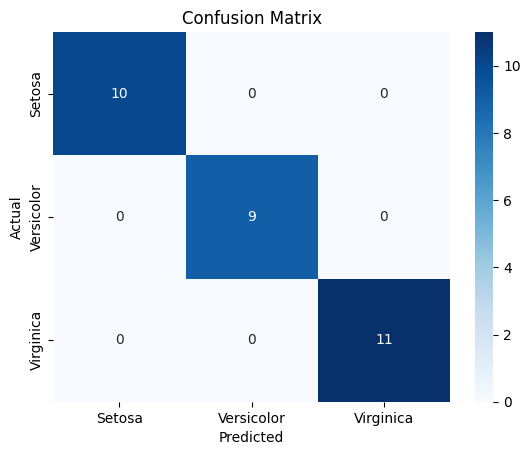

In [26]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
species_names = list(species_map.values())
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=species_names, yticklabels=species_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()